## Análisis de datos

## Carga de librerías

In [816]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from datetime import datetime

## Carga de datos train.csv, mostrar primeras filas del dataset y el número de registros

In [817]:
ruta_absoluta = os.path.abspath(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\train.csv')
print(ruta_absoluta)

X_train = pd.read_csv(ruta_absoluta)


# Mostrar las primeras filas del DataFrame
print(X_train.head())

# Mostrar el número de registros (filas) en el DataFrame X_train
num_registros = X_train.shape[0]
print(f"El número de registros es: {num_registros}")


C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\train.csv
   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                 

## Carga de datos de test.csv, mostrar sus primeras líneas y el número de registros


In [818]:
ruta_absoluta = os.path.abspath(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\test.csv')
print(ruta_absoluta)

X_test = pd.read_csv(ruta_absoluta)


# Mostrar las primeras filas del DataFrame
print(X_test.head())

# Mostrar el número de registros (filas) en el DataFrame X_train
num_registros = X_test.shape[0]
print(f"El número de registros es: {num_registros}")

C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\playground-series-s4e9\test.csv
       id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/

## Revisar el número de columnas en ambos datasets

In [819]:
# Verificar el número de columnas en ambos datasets
print(f"Train tiene {X_train.shape[1]} columnas.")
print(f"Test tiene {X_test.shape[1]} columnas.")


Train tiene 13 columnas.
Test tiene 12 columnas.


## Nos aseguramos de que los nombres de las columnas coincidan en ambos datasets y de que haya la misma cantidad de columnas

In [820]:
# Verificar que los nombres de las columnas (features) sean los mismos
train_columns = X_train.columns
test_columns = X_test.columns

# Excluyendo la columna objetivo de train, si existe
train_columns = train_columns.drop('price', errors='ignore')

if all(train_columns == test_columns):
    print("Las columnas coinciden.")
else:
    print("Las columnas NO coinciden.")

Las columnas coinciden.


## Verificar el tipo de datos en cada columna en ambos datasets

In [821]:
# Verificar los tipos de datos de cada columna en X_train
print(X_train.dtypes)

print(X_test.dtypes)


id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object
id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object


## Cálculo de edad de los coches (añadir una columna llamada "age") a X_train

In [822]:
# 1. Obtener el año actual
current_year = datetime.now().year

# 2. Calcular la edad del coche
X_train['age'] = current_year - X_train['model_year']

# 3. Opcional: Eliminar la columna original 'model_year' si ya no la necesitas
X_train = X_train.drop(columns=['model_year'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'age'
print(X_train.head())

   id          brand              model  milage      fuel_type  \
0   0           MINI      Cooper S Base  213000       Gasoline   
1   1        Lincoln              LS V8  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4

## Cálculo de edad de los coches (añadir una columna llamada "age") a X_test

In [823]:
# 1. Obtener el año actual
current_year = datetime.now().year

# 2. Calcular la edad del coche
X_test['age'] = current_year - X_test['model_year']

# 3. Opcional: Eliminar la columna original 'model_year' si ya no la necesitas
X_test = X_test.drop(columns=['model_year'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'age'
print(X_test.head())

       id brand                 model  milage fuel_type  \
0  188533  Land        Rover LR2 Base   98000  Gasoline   
1  188534  Land     Rover Defender SE    9142    Hybrid   
2  188535  Ford    Expedition Limited   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  age  
0            White   Beige  None reported         Yes    9  
1           Silver   Black  None reported         Yes    4  
2    

## Eliminar columna ID de X_train y X_test

In [824]:
X_train = X_train.drop(columns=['id'], errors='ignore')  # 'errors="ignore"' evita errores si 'id' no existe


X_test = X_test.drop(columns=['id'], errors='ignore')  # 'errors="ignore"' evita errores si 'id' no existe



## Estadísticas de X_train

In [825]:
# Ver las estadísticas descriptivas de X_train
X_train_stats = X_train.drop(columns=['id'], errors='ignore')  
print(X_train_stats.describe())


              milage         price            age
count  188533.000000  1.885330e+05  188533.000000
mean    65705.295174  4.387802e+04       8.170002
std     49798.158076  7.881952e+04       5.660967
min       100.000000  2.000000e+03       0.000000
25%     24115.000000  1.700000e+04       4.000000
50%     57785.000000  3.082500e+04       7.000000
75%     95400.000000  4.990000e+04      11.000000
max    405000.000000  2.954083e+06      50.000000


## Verificar el número de nulos presentes en el dataset X_train y en X_test

In [826]:
# Verificar el número de valores nulos en cada columna
print(X_train.isnull().sum())

print(X_test.isnull().sum())


brand               0
model               0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
age                 0
dtype: int64
brand               0
model               0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
age                 0
dtype: int64


## Reemplazar valores nulos en el dataset X_train con la media para los valores numéricos y la moda para las variables categóricas

In [827]:

# Para columnas numéricas: reemplazar NaN con la media
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].mean())

# Para columnas categóricas: reemplazar NaN con la moda
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    moda = X_train[col].mode()[0]  # Obtener la moda
    X_train[col] = X_train[col].fillna(moda)  # Reemplazar NaN con la moda

# Verificar si hay valores nulos restantes
print(X_train.isnull().sum())


brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
age             0
dtype: int64


## Reemplazar valores nulos en el dataset X_test con la media para los valores numéricos y la moda para las variables categóricas

In [828]:
# Para columnas numéricas: reemplazar NaN con la media
numerical_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numerical_cols_test] = X_test[numerical_cols_test].fillna(X_test[numerical_cols_test].mean())

# Para columnas categóricas: reemplazar NaN con la moda
categorical_cols_test = X_test.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    moda = X_test[col].mode()[0]  # Obtener la moda
    X_test[col] = X_test[col].fillna(moda)  # Reemplazar NaN con la moda

# Verificar si hay valores nulos restantes
print(X_test.isnull().sum())


brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
age             0
dtype: int64


## Graficar histogramas, gráficos de caja y matriz de correlación de X_train_cleaned

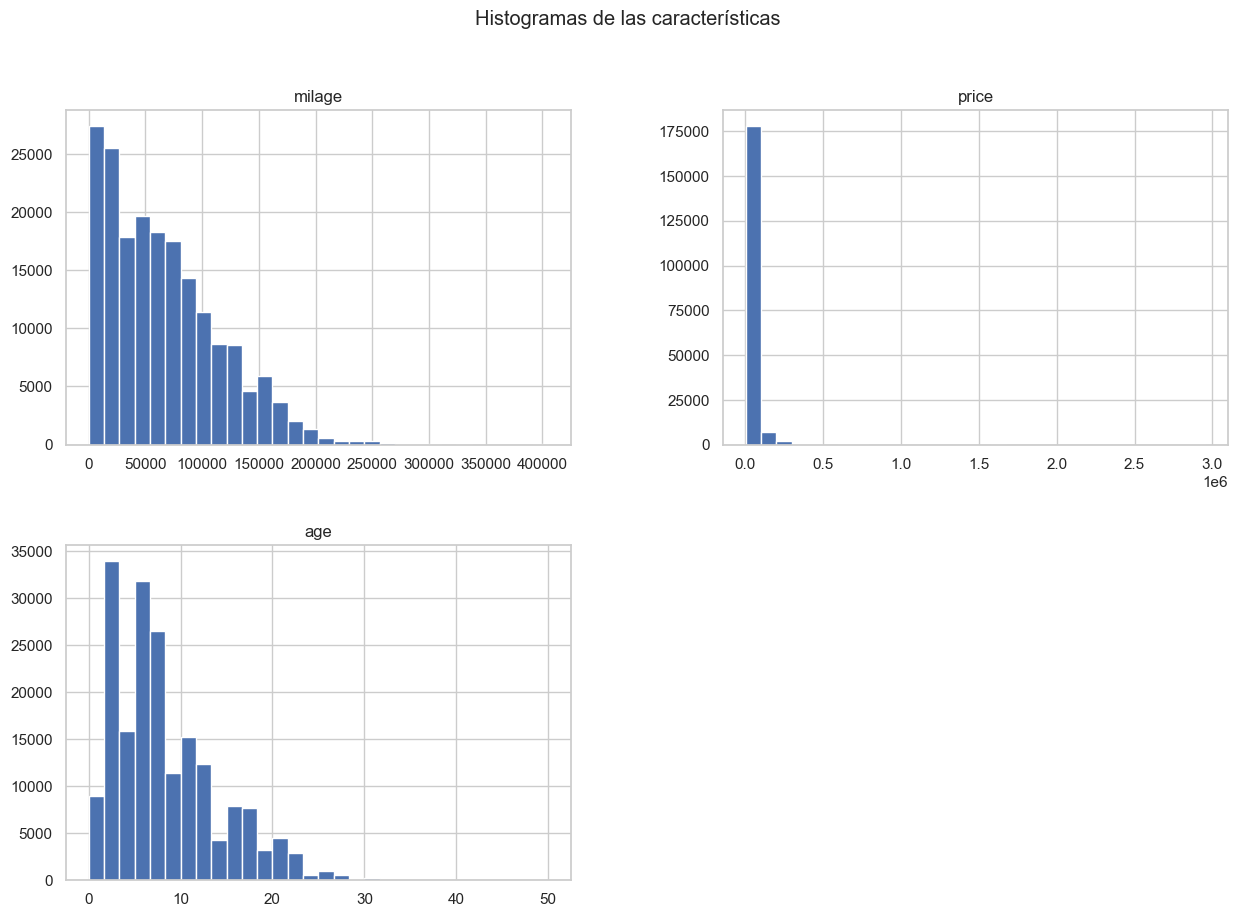

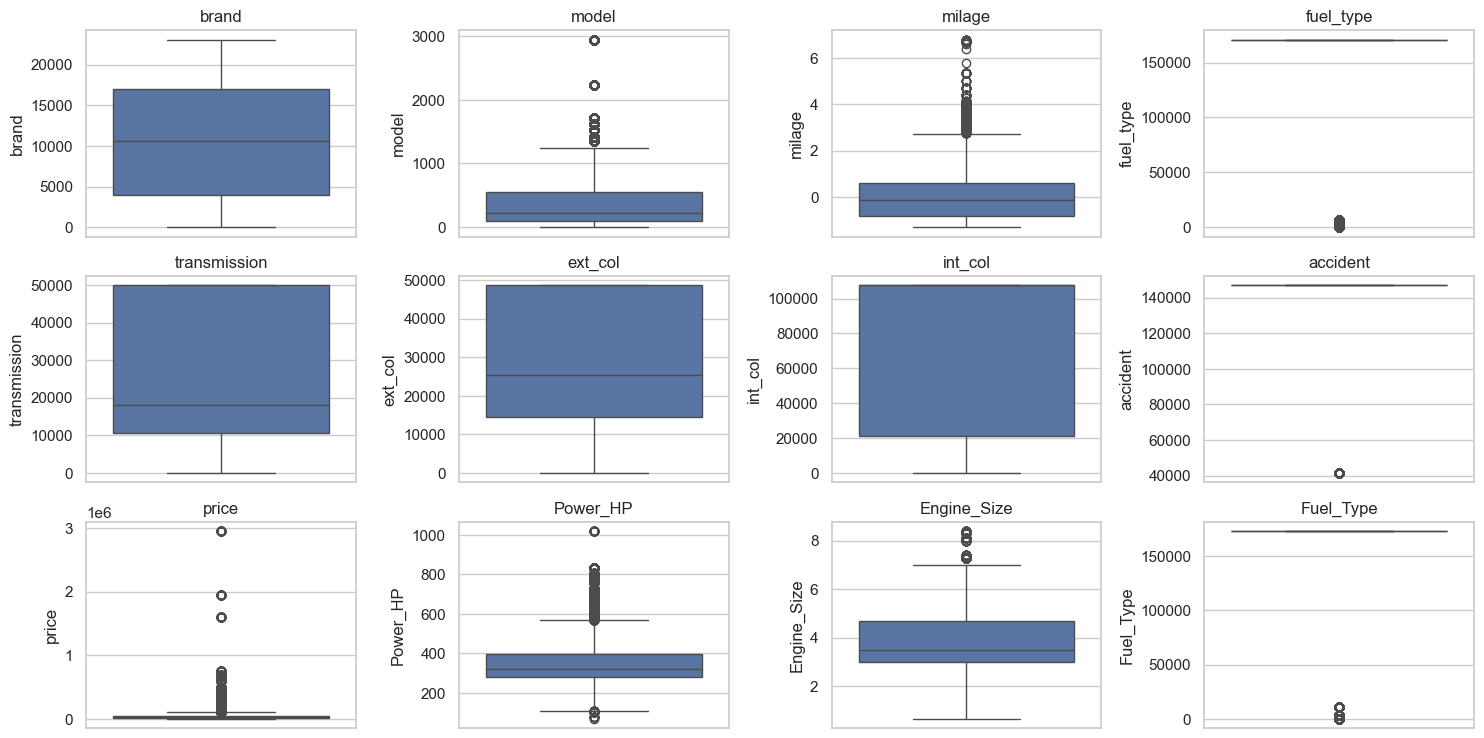

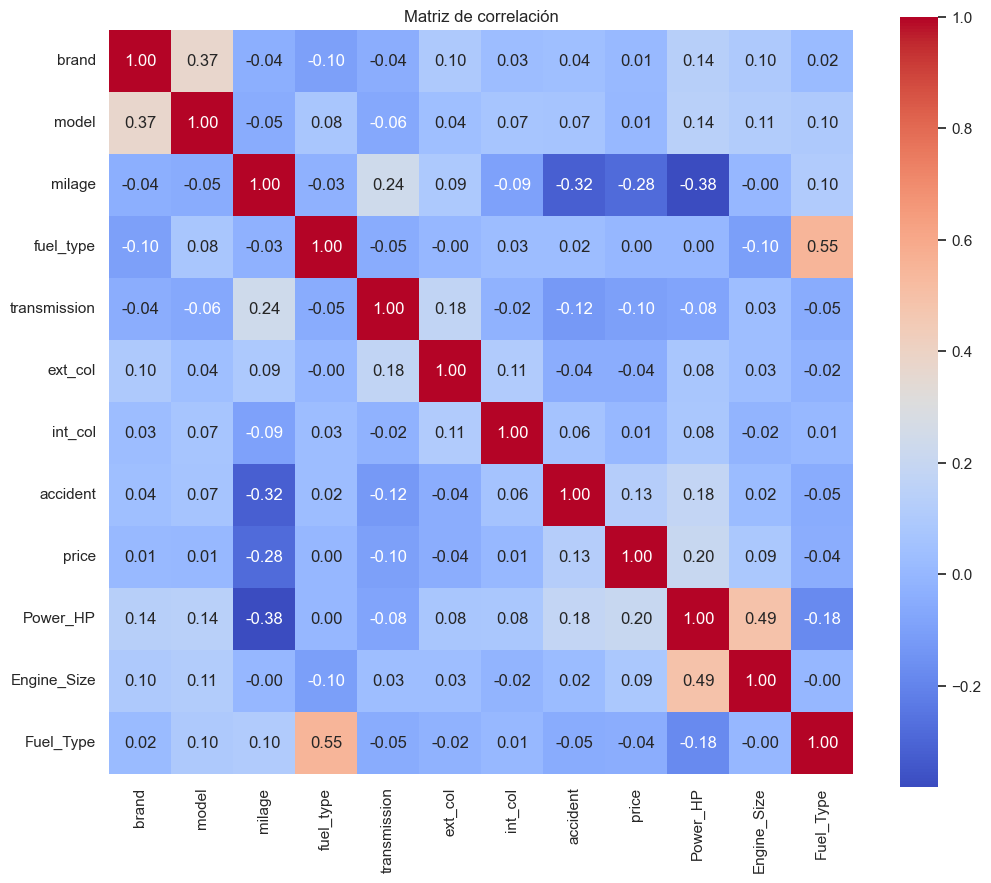

In [829]:
# Establecer el estilo de seaborn
sns.set(style='whitegrid')

# Eliminar la columna 'PassengerId' del DataFrame
X_train = X_train.drop(columns=['id'], errors='ignore')

# 1. Histogramas
def plot_histograms(X_train):
    numeric_data = X_train.select_dtypes(include=['float64', 'int64'])
    numeric_data.hist(bins=30, figsize=(15, 10))
    plt.suptitle('Histogramas de las características')
    plt.show()

plot_histograms(X_train)

# 2. Gráficos de caja para detectar valores atípicos
def box_plots(X_train):
    plt.figure(figsize=(15, 10))
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(y=X_train[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

box_plots(X_train_cleaned)

# 3. Matriz de correlación
def correlation_heatmap(X_train):
    numeric_data = X_train.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 10))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Matriz de correlación')
    plt.show()

correlation_heatmap(X_train_cleaned)


## Identificar los outliers

In [831]:
def count_outliers_iqr(X_train, column):
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Contar los outliers
    outlier_count = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)].shape[0]
    return outlier_count

# Contar outliers en cada columna
outliers_model_year_count = count_outliers_iqr(X_train, 'age')
outliers_mileage_count = count_outliers_iqr(X_train, 'milage')
outliers_price_count = count_outliers_iqr(X_train, 'price')

# Mostrar el conteo de outliers
print(f"Número de outliers en age: {outliers_model_year_count}")
print(f"Número de outliers en milage: {outliers_mileage_count}")
print(f"Número de outliers en price: {outliers_price_count}")




Número de outliers en age: 5132
Número de outliers en milage: 1766
Número de outliers en price: 10880


## Verificación de frecuencias de cada categoría

In [832]:
# Mostrar frecuencias de cada columna categórica antes de la agrupación
for column in X_train.select_dtypes(include=['object']).columns:
    print(f'Frecuencias para la columna {column}:')
    print(X_train[column].value_counts())
    print("\n")


Frecuencias para la columna brand:
brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren         

## Eliminar la columna "clean_title" y "age" de X_train_cleaned y X_test_cleaned. "Age" la elimino porque tiene una correlación muy alta con "milage"

In [833]:
# Eliminar las columnas 'clean_title' y 'age' de X_train_cleaned y X_test_cleaned
X_train_cleaned = X_train.drop(columns=['clean_title'], errors='ignore')
X_test_cleaned = X_test.drop(columns=['clean_title'], errors='ignore')

# Verificar que las columnas hayan sido eliminadas
print("Columnas en X_train_cleaned:", X_train.columns)
print("Columnas en X_test_cleaned:", X_test.columns)


Columnas en X_train_cleaned: Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'age'],
      dtype='object')
Columnas en X_test_cleaned: Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'age'],
      dtype='object')


## Verificar de nuevo los valores nulos o NaN

In [834]:
print(X_train_cleaned.isnull().sum())
print(X_test_cleaned.isnull().sum())


brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
age             0
dtype: int64
brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
age             0
dtype: int64


## Encoding de X_train y X_test con frecuency encoder. Frequency Encoding sustituye cada categoría por la frecuencia con la que aparece en el conjunto de datos

In [835]:
# Verifica las columnas disponibles
print("Columnas en X_train:", X_train.columns.tolist())
print("Columnas en X_test:", X_test.columns.tolist())

# Genera la lista de columnas categóricas
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Aplica la codificación de frecuencia
for col in categorical_columns:
    if col in X_train.columns:
        X_train= frequency_encoding(X_train, col)
    else:
        print(f"Columna {col} no encontrada en X_train.")

    if col in X_test.columns:
        X_test = frequency_encoding(X_test, col)
    else:
        print(f"Columna {col} no encontrada en X_test.")

print(X_train.head())



Columnas en X_train: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'age']
Columnas en X_test: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'age']
   brand  model  milage  fuel_type  engine  transmission  ext_col  int_col  \
0   1064    578  213000     171023     344         49904      978    21204   
1   2423     29  143250     171023      79         49904    16995    24495   
2  16335     62  136731       5406     784         49904    14555    21204   
3    969     95   19500     171023     188         19255    48658   107674   
4  19172    521    7388     171023     691         11124    48658    24495   

   accident  clean_title  price  age  
0    146966       188533   4200   17  
1     41567       188533   4999   22  
2    146966       188533  13900   22  
3    146966       188533  45000    7  
4    146966       188533  97500    3  

## Estandarizar variables numéricas en X_train

In [836]:
# 1. Eliminar la columna 'id' si existe
X_train_cleaned = X_train.drop(columns=['id'], errors='ignore')

# 2. Seleccionar las columnas numéricas a estandarizar
numeric_columns = ['milage']

# 3. Inicializar el escalador
scaler = StandardScaler()

# 4. Estandarizar las columnas numéricas
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Mostrar las primeras filas del DataFrame estandarizado
print(X_train.head())

   brand  model    milage  fuel_type  engine  transmission  ext_col  int_col  \
0   1064    578  2.957842     171023     344         49904      978    21204   
1   2423     29  1.557184     171023      79         49904    16995    24495   
2  16335     62  1.426276       5406     784         49904    14555    21204   
3    969     95 -0.927854     171023     188         19255    48658   107674   
4  19172    521 -1.171076     171023     691         11124    48658    24495   

   accident  clean_title  price  age  
0    146966       188533   4200   17  
1     41567       188533   4999   22  
2    146966       188533  13900   22  
3    146966       188533  45000    7  
4    146966       188533  97500    3  


## Estandarizar X_test

In [837]:
# 1. Eliminar la columna 'id' si existe
X_test = X_test.drop(columns=['id'], errors='ignore')

# 2. Seleccionar las columnas numéricas a estandarizar
numeric_columns = ['milage']

# 3. Inicializar el escalador
scaler = StandardScaler()

# 4. Estandarizar las columnas numéricas en X_test_encoded
X_test[numeric_columns] = scaler.fit_transform(X_test[numeric_columns])

# Mostrar las primeras filas del DataFrame estandarizado
print(X_test.head())

   brand  model    milage  fuel_type  engine  transmission  ext_col  int_col  \
0   6348     28  0.636302     113916    1966         12061    29225    16495   
1   6348    120 -1.132944       4676     640         13941    11348    71613   
2  15265    369 -0.755054     113916    1258          2104    29225     1206   
3   7289     47 -0.095265     113916     404          7175       15    71613   
4   7289    159 -0.140224     113916     716         33132    16900    71613   

   accident  clean_title  age  
0     97895       125690    9  
1     97895       125690    4  
2     97895       125690    2  
3     97895       125690    8  
4     97895       125690    6  


## Separación de la variable objetivo del dataset X_train

In [838]:
# 1. Separar la variable objetivo 'price'
y_train = X_train['price']

# 2. Eliminar la variable objetivo del conjunto de características
X_train_features = X_train.drop(columns=['price'])

# Mostrar las primeras filas de las características y la variable objetivo
print("Características (X_train_features):")
print(X_train_features.head())
print("\nVariable objetivo (y_train):")
print(y_train.head())

Características (X_train_features):
   brand  model    milage  fuel_type  engine  transmission  ext_col  int_col  \
0   1064    578  2.957842     171023     344         49904      978    21204   
1   2423     29  1.557184     171023      79         49904    16995    24495   
2  16335     62  1.426276       5406     784         49904    14555    21204   
3    969     95 -0.927854     171023     188         19255    48658   107674   
4  19172    521 -1.171076     171023     691         11124    48658    24495   

   accident  clean_title  age  
0    146966       188533   17  
1     41567       188533   22  
2    146966       188533   22  
3    146966       188533    7  
4    146966       188533    3  

Variable objetivo (y_train):
0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64


## Aplicación de PCA a X_train_features

In [839]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que X_train_features ya está definido
# Asegúrate de que tus características estén estandarizadas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)

# Aplicar PCA
n_components = 2  # Cambia esto según el número de componentes que desees
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Convertir a DataFrame para facilitar la visualización (opcional)
X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=[f'Principal Component {i+1}' for i in range(n_components)])

# Mostrar resultados
print(X_train_pca_df.head())


   Principal Component 1  Principal Component 2
0               3.081581              -0.326004
1               3.990623              -0.526441
2               2.712129               0.147785
3              -0.368976              -1.234081
4              -1.497866               0.287691


## Aplicar PCA a X_test

In [840]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que X_train_features ya está definido
# Asegúrate de que tus características estén estandarizadas
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Aplicar PCA
n_components = 2  # Cambia esto según el número de componentes que desees
pca = PCA(n_components=n_components)
X_test_pca = pca.fit_transform(X_test_scaled)

# Convertir a DataFrame para facilitar la visualización (opcional)
X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=[f'Principal Component {i+1}' for i in range(n_components)])

# Mostrar resultados
print(X_test_pca_df.head())

   Principal Component 1  Principal Component 2
0              -0.118169               0.697883
1              -1.192343              -1.169360
2              -1.921512               1.062451
3              -0.540930              -1.093810
4              -0.161915               0.056483


## Guardar los datasets X_train_features y_train y X_test en formato csv

In [841]:
# Guardar X_train_features en un archivo CSV
X_train_features.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\X_train_features.csv', index=False)

# Guardar y_train en un archivo CSV
y_train.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\y_train.csv', index=False)

print("Los datasets se han guardado como 'X_train_features.csv' y 'y_train.csv'.")



# Renombrar X_test a X_test_clean
X_test_clean = X_test.copy()  # Hacer una copia si es necesario

# Guardar X_test_clean en un archivo CSV
X_test_clean.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\X_test_clean.csv', index=False)

print("El dataset se ha guardado como 'X_test_clean.csv'.")



Los datasets se han guardado como 'X_train_features.csv' y 'y_train.csv'.
El dataset se ha guardado como 'X_test_clean.csv'.


## Guardar los dataset con PCA

In [842]:
# Guardar X_train_pca_df en un archivo CSV
X_train_pca_df.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\X_train_pca_df.csv', index=False)

print("El dataset se ha guardado como 'X_train_pca_df.csv'.")

# Guardar X_test_clean en un archivo CSV
X_test_pca_df.to_csv(r'C:\Users\Administrator\Documents\Proyecto regresion precio coches\proyecto_regresion\data\X_test_pca_df.csv', index=False)

print("El dataset se ha guardado como 'X_test_pca_df.csv'.")

El dataset se ha guardado como 'X_train_pca_df.csv'.
El dataset se ha guardado como 'X_test_pca_df.csv'.
